In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.decomposition import PCA

In [56]:
data_file = '/media/amlan/Data/Thesis Data/Processed Data/train_data.csv'
df = pd.read_csv(data_file, index_col=0)
df = df.reset_index(drop=True)

df = df[df.Behavior != 'No observation']
df = df[df.VeDBA > 1e-5]
df.VeDBA  = np.log(df.VeDBA)
df = df.rename(columns={'VeDBA': 'Log VeDBA'})


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.reset_index(drop=True)
df.Behavior.value_counts()

Scrabbling                        2822
Foraging                          1661
Bipedal vigilance                  718
Self groom                         241
Reforage                           184
Haunch quadrupedal vigilance       138
Standing quadrupedal vigilance     123
Social                             114
Running                            103
Sitting vigilance                   88
Processing                          61
Walking                             56
Marking                              4
Others                               2
Name: Behavior, dtype: int64

In [57]:
for i in df.Behavior.unique():
    print(str(i) + ' Log VeDBA Mean: ',df.loc[df['Behavior'] == str(i),'Log VeDBA'].mean())
    print(str(i) + ' Log VeDBA Var: ',df.loc[df['Behavior'] == str(i),'StdNorm'].mean())
    print('---')

Haunch quadrupedal vigilance Log VeDBA Mean:  -3.0319779132062736
Haunch quadrupedal vigilance Log VeDBA Var:  0.056545588169749125
---
Sitting vigilance Log VeDBA Mean:  -3.2822839897974756
Sitting vigilance Log VeDBA Var:  0.03300184612656386
---
Scrabbling Log VeDBA Mean:  -0.9766557874897362
Scrabbling Log VeDBA Var:  0.29613885702374176
---
Foraging Log VeDBA Mean:  -0.7816592796597368
Foraging Log VeDBA Var:  0.3632461327538274
---
Bipedal vigilance Log VeDBA Mean:  -2.819586673728579
Bipedal vigilance Log VeDBA Var:  0.08291630741144203
---
Processing Log VeDBA Mean:  -1.373400263981216
Processing Log VeDBA Var:  0.2186395807400244
---
Reforage Log VeDBA Mean:  -0.8459114897715867
Reforage Log VeDBA Var:  0.3474908525433528
---
Running Log VeDBA Mean:  -0.9474380312776847
Running Log VeDBA Var:  0.6056272907344382
---
Walking Log VeDBA Mean:  -1.2419185892299056
Walking Log VeDBA Var:  0.29929501673791675
---
Standing quadrupedal vigilance Log VeDBA Mean:  -2.5809179524861947
St

In [90]:
df.loc[df['Behavior'] == 'Sitting vigilance','Behavior'] = 'Vigilance'
df.loc[df['Behavior'] == 'Bipedal vigilance','Behavior'] = 'Vigilance'
df.loc[df['Behavior'] == 'Haunch quadrupedal vigilance','Behavior'] = 'Vigilance'
df.loc[df['Behavior'] == 'Standing quadrupedal vigilance','Behavior'] = 'Vigilance'

df.loc[df['Behavior'] == 'Walking','Behavior'] = 'Moving'


df.loc[df['Behavior'] == 'Scrabbling','Behavior'] = 'Foraging' #Change

df.loc[df['Behavior'] == 'Reforage','Behavior'] = 'Foraging'

df.loc[df['Behavior'] == 'Social','Behavior'] = 'Others'
df.loc[df['Behavior'] == 'Processing','Behavior'] = 'Others'
df.loc[df['Behavior'] == 'Self groom','Behavior'] = 'Others'
df.loc[df['Behavior'] == 'Marking','Behavior'] = 'Others'

for i in df.Behavior.unique():
    print(str(i) + ' Log VeDBA Mean: ',df.loc[df['Behavior'] == str(i),'Log VeDBA'].mean())
    print(  str(i) + ' Log VeDBA Var: ',df.loc[df['Behavior'] == str(i),'Log VeDBA'].var())
    print('\n')

Vigilance Log VeDBA Mean:  -2.857703920353857
Vigilance Log VeDBA Var:  1.151022995588004


Foraging Log VeDBA Mean:  -0.9021012234687873
Foraging Log VeDBA Var:  0.1972636471804652


Others Log VeDBA Mean:  -1.5778542980561852
Others Log VeDBA Var:  0.48227554434071657


Running Log VeDBA Mean:  -0.9474380312776847
Running Log VeDBA Var:  2.2077640921674617


Moving Log VeDBA Mean:  -1.2419185892299056
Moving Log VeDBA Var:  1.0283063721645664




Text(0.5, 1.0, 'VeDBA Distribution Across Behavior')

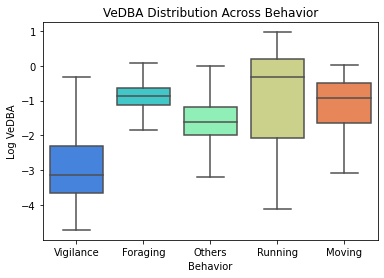

In [91]:
import seaborn as sns

fig,ax = plt.subplots()
sns.boxplot(x='Behavior',y='Log VeDBA',data=df[['Behavior','Log VeDBA']], palette='rainbow',showfliers=False)
plt.title("VeDBA Distribution Across Behavior")

In [409]:
df['Behavior'] == 'Running'

0       False
1       False
2       False
3       False
4       False
        ...  
7475    False
7476    False
7477    False
7478    False
7479    False
Name: Behavior, Length: 7480, dtype: bool

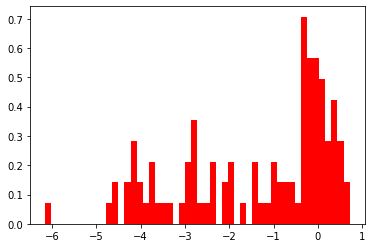

In [60]:
#plt.hist(np.log(df.loc[df['Behavior'] != 'Running','StdNorm']),bins=50,color='b',density='True')
plt.hist(np.log(df.loc[df['Behavior'] == 'Running','StdNorm']),bins=50,color='r',density='True') 
plt.show()

In [326]:
df.Behavior.value_counts()

Foraging     5310
Vigilance    1424
Others        484
Running       160
Moving        102
Name: Behavior, dtype: int64

In [61]:
df_delay1 = pd.DataFrame()
df_delay1['Timestamp'] = df['Timestamp'] + pd.Timedelta('2s')
df_delay1['Delay_X_Mean1'] =  df['X_Mean']
df_delay1['Delay_X_Max1'] =  df['X_Max']
df_delay1['Delay_LogVeDBA1'] =  df['Log VeDBA']
df_delay1.head()

,Timestamp,Delay_X_Mean1,Delay_X_Max1,Delay_LogVeDBA1
0,2021-08-14 10:12:01,-0.678976,-0.5158,-2.423731
1,2021-08-14 10:12:02,-0.756978,-0.6327,-1.334830
2,2021-08-14 10:12:03,-0.713138,-0.6202,-2.557237
3,2021-08-14 10:12:04,-0.754204,-0.6058,-1.788817
4,2021-08-14 10:12:05,-0.782126,-0.7034,-3.063260


In [62]:
df_delay = pd.DataFrame()
df_delay['Timestamp'] = df['Timestamp'] + pd.Timedelta('1s')
df_delay['Delay_X_Mean'] =  df['X_Mean']
df_delay['Delay_X_Max'] =  df['X_Max']
df_delay['Delay_LogVeDBA'] =  df['Log VeDBA']
print(df_delay.head())


            Timestamp  Delay_X_Mean  Delay_X_Max  Delay_LogVeDBA
0 2021-08-14 10:12:00     -0.678976      -0.5158       -2.423731
1 2021-08-14 10:12:01     -0.756978      -0.6327       -1.334830
2 2021-08-14 10:12:02     -0.713138      -0.6202       -2.557237
3 2021-08-14 10:12:03     -0.754204      -0.6058       -1.788817
4 2021-08-14 10:12:04     -0.782126      -0.7034       -3.063260


In [63]:
A = df.merge(df_delay,on = 'Timestamp',how='inner')
X = A.merge(df_delay1,on = 'Timestamp',how='inner')
#X = A
X.head()

,Timestamp,Behavior,Group,Individual,X_Mean,Y_Mean,Z_Mean,X_Var,Y_Var,Z_Var,...,Y_Min,Z_Min,Log VeDBA,StdNorm,Delay_X_Mean,Delay_X_Max,Delay_LogVeDBA,Delay_X_Mean1,Delay_X_Max1,Delay_LogVeDBA1
0,2021-08-14 10:12:01,Vigilance,NQ,VNQF014,-0.713138,-0.570652,0.316574,0.001709,0.003561,0.004448,...,-0.6965,0.0678,-2.557237,0.043237,-0.756978,-0.6327,-1.334830,-0.678976,-0.5158,-2.423731
1,2021-08-14 10:12:02,Vigilance,NQ,VNQF014,-0.754204,-0.557768,0.227460,0.004396,0.018012,0.015511,...,-1.1410,-0.0469,-1.788817,0.075593,-0.713138,-0.6202,-2.557237,-0.756978,-0.6327,-1.334830
2,2021-08-14 10:12:03,Vigilance,NQ,VNQF014,-0.782126,-0.516732,0.212264,0.000703,0.001587,0.001007,...,-0.6408,0.1407,-3.063260,0.026440,-0.754204,-0.6058,-1.788817,-0.713138,-0.6202,-2.557237
3,2021-08-14 10:12:04,Vigilance,NQ,VNQF014,-0.782132,-0.521298,0.217310,0.000207,0.000174,0.000288,...,-0.5471,0.1876,-3.756245,0.011831,-0.782126,-0.7034,-3.063260,-0.754204,-0.6058,-1.788817
4,2021-08-14 10:12:05,Vigilance,NQ,VNQF014,-0.694816,-0.530842,0.388512,0.006141,0.025079,0.012417,...,-0.8153,0.0982,-1.723674,0.063183,-0.782132,-0.7365,-3.756245,-0.782126,-0.7034,-3.063260


Running Mean

Accuracy: 0.9113222486144101


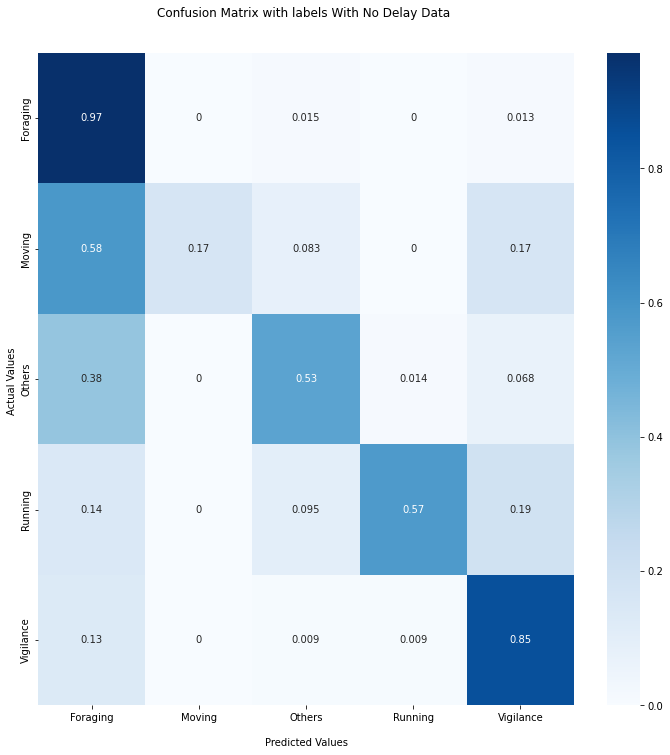

In [95]:
Rolling_df = df.iloc[:,4:].rolling(window=2).mean() #using n-1, n-2
Rolling_df['Timestamp'] = df['Timestamp']
behav = df[['Timestamp','Behavior','Group','Individual']]
X_Rolling = behav.merge(Rolling_df,on='Timestamp',how='inner').dropna()


x=X_Rolling.iloc[:,4:]  # Features
#x=df.iloc[:,4:]  # Features

y=X_Rolling['Behavior']  # Labels

Scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test

clf=RandomForestClassifier(n_estimators=150, n_jobs=-1,class_weight='balanced', random_state=42)


X_train = Scaler.fit_transform(X_train)

clf.fit(X_train,y_train)


X_test = Scaler.transform(X_test)

y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With No Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

In [83]:
df = df.drop(['StdNorm'], axis=1)

RF

Accuracy: 0.9026128266033254


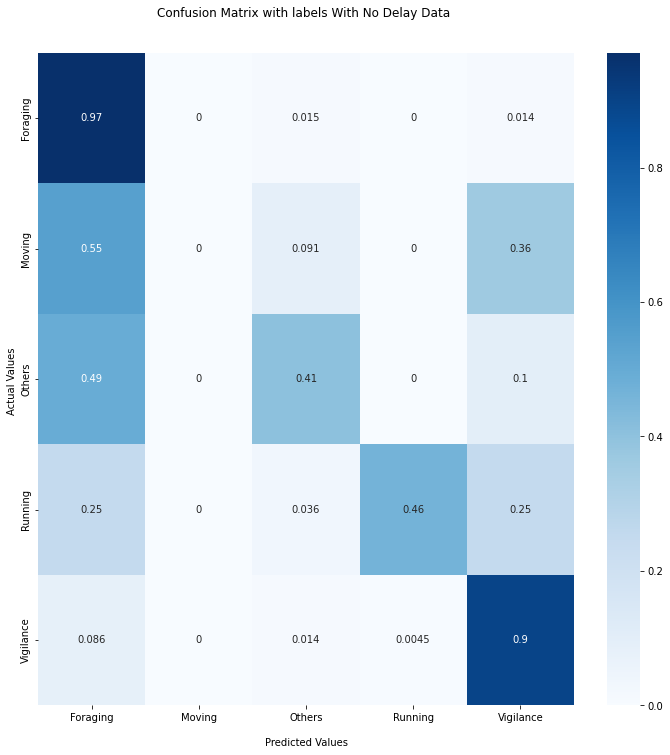

In [99]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.decomposition import PCA

x=df.iloc[:,4:]  # Features
#x=df.iloc[:,4:]  # Features




y=df['Behavior']  # Labels


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test

clf=RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)


X_train = Scaler.fit_transform(X_train)

clf.fit(X_train,y_train)


X_test = Scaler.transform(X_test)

y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With No Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

SMOTE RF

Accuracy: 0.8891528107680127


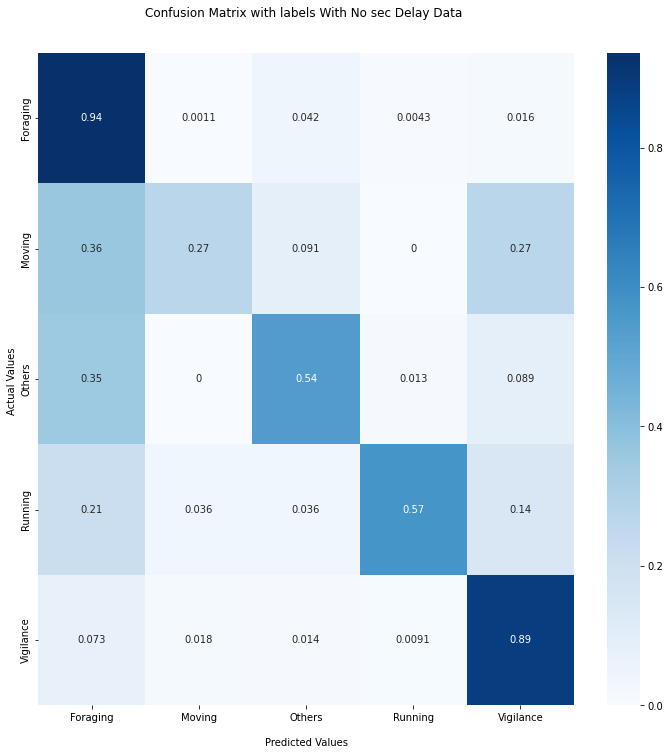

In [89]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()


x=df.iloc[:,4:]  # Features
y=df['Behavior']  # Labels


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test

clf=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)


X_train = Scaler.fit_transform(X_train)


X_train, y_train = oversample.fit_resample(X_train, y_train)

clf.fit(X_train,y_train)


X_test = Scaler.transform(X_test)

y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With No sec Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

XGB

Accuracy: 0.9286376274328082


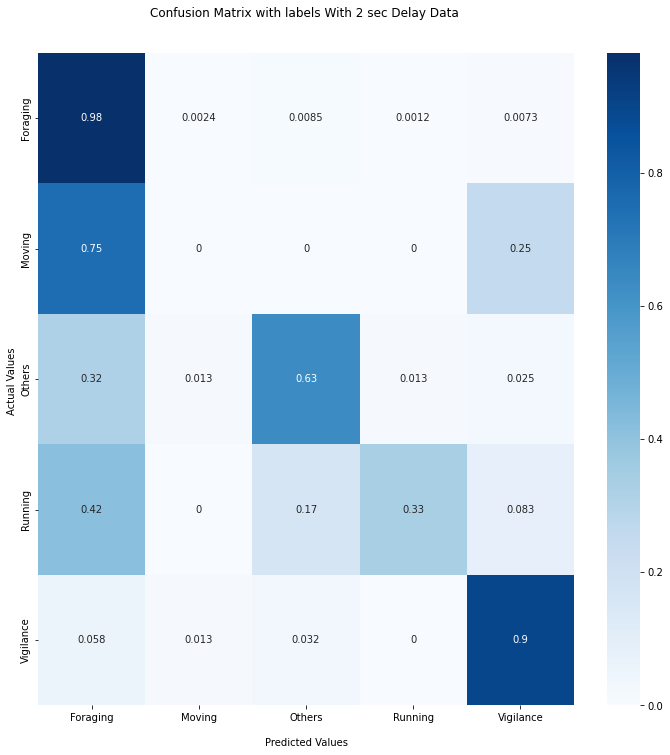

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

x=X.iloc[:,4:]  # Features
#x=df.iloc[:,4:]  # Features




y=X['Behavior']  # Labels

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42) 

clf = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With 2 sec Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

SVM

Accuracy: 0.9258572752548656


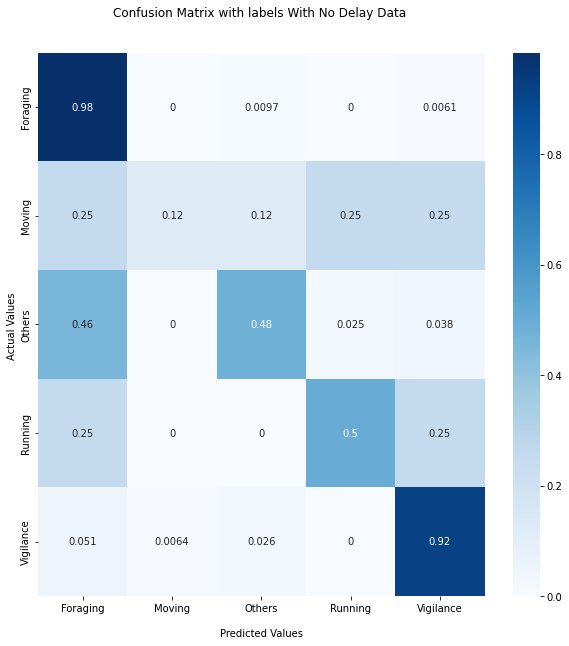

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.decomposition import PCA

x=X.iloc[:,4:]  # Features
#X.iloc[:,-1] = np.log(X.iloc[:,-1]+1)

Scaler = StandardScaler()

y=X['Behavior']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test


X_train = Scaler.fit_transform(X_train)

svclassifier = SVC(kernel='linear', gamma='scale')
svclassifier.fit(X_train, y_train)

X_test = Scaler.transform(X_test)

y_pred=svclassifier.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(10,10))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With No Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

KNN

Accuracy: 0.933271547729379


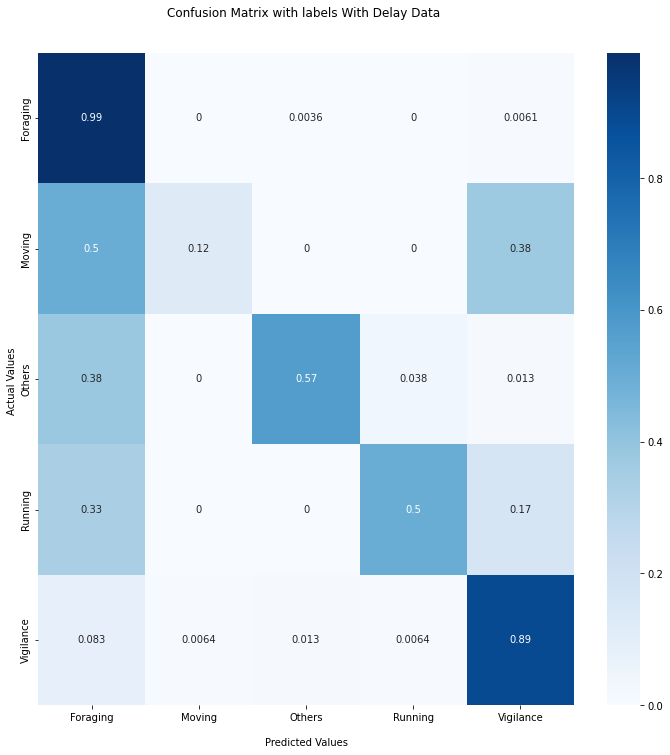

In [71]:
from sklearn.neighbors import KNeighborsClassifier

x=X.iloc[:,4:]  # Features

Scaler = StandardScaler()

y=X['Behavior']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test


X_train = Scaler.fit_transform(X_train)


knn = KNeighborsClassifier(n_neighbors=10)


X_test = Scaler.transform(X_test)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,12))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With Delay Data \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

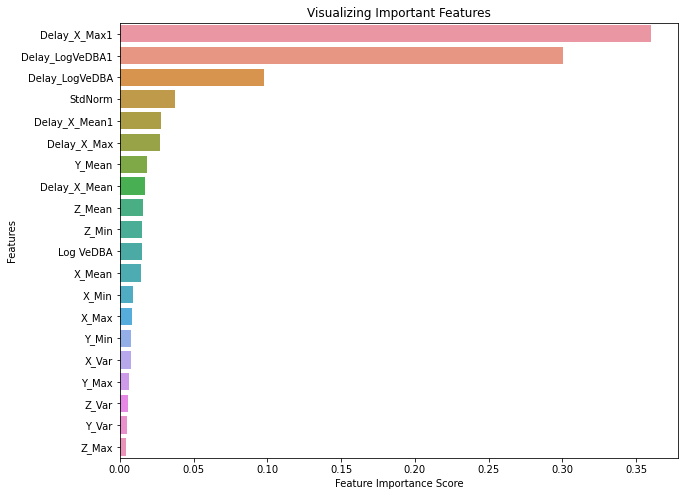

In [72]:
plt.figure(figsize=(10,8))
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()